**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [116]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [117]:
# Ваш код здесь
adver_data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [118]:
# Ваш код здесь
adver_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [324]:
X = np.array([adver_data['TV'], adver_data['Radio'], adver_data['Newspaper']]) # Ваш код здесь
X = X.T
y = np.array(adver_data['Sales']) # Ваш код здесь
# print(X)


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [325]:
means = np.mean(X, axis=0)
X = X - means
stds = np.std(X, axis=0) # Ваш код здесь
# print(X)



In [326]:
X = X /stds # Ваш код здесь

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [327]:
import numpy as np
N = X.shape[0]
print(N)
one = np.ones((N,1))
X = np.hstack((one, X)) # Ваш код здесь
print(X)

200
[[ 1.00000000e+00  9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [ 1.00000000e+00 -1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [ 1.00000000e+00 -1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 1.00000000e+00  5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 1.00000000e+00  3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [ 1.00000000e+00 -1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [ 1.00000000e+00 -1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [ 1.00000000e+00 -3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [ 1.00000000e+00 -1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 1.00000000e+00  6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [ 1.00000000e+00 -9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 1.00000000e+00  7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [ 1.00000000e+00 -1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [ 1.00000000e+00 -5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 1.00000000e+00  6.66253447e-01  6.50657027e-01  7.11007

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [328]:
def mserror(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    return np.mean((y - y_pred)**2) # Ваш код здесь

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [329]:
med = np.median(np.array(adver_data['Sales']))
y_pred = np.ones((N))*med
y = np.array(adver_data['Sales'])
# print(y_pred, y)
answer1 =  mserror(y, y_pred)
print(round(answer1, 3))
# answer1 = 28.34575

28.346


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [330]:
def normal_equation(X, y):
    X_t = X.transpose()
    X_obr = np.dot(X_t, X)
    X_obr = np.linalg.inv(X_obr)
    Sol = np.dot(X_obr, X_t)
    return np.dot(Sol,y)  # Ваш код здесь

In [331]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)
# [ 3.91925365  2.79206274 -0.02253861 14.0225    ]

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [333]:
X_0 = np.array([1, 0, 0, 0])
answer2 = np.dot(X_0,norm_eq_weights) # Ваш код здесь
print(np.round(answer2, 3))

# 14.022

14.022


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [334]:
def linear_prediction(X, w):
    return np.dot(X,w) # Ваш код здесь

# print(X)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [335]:
y_pred = linear_prediction(X, norm_eq_weights)
y = np.array(adver_data['Sales'])

answer3 = mserror(y, y_pred) # Ваш код здесь
print(round(answer3, 3))

# 2.784

2.784


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [336]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    res = X[train_ind][0]*w[0] + X[train_ind][1]*w[1] + X[train_ind][2]*w[2] + X[train_ind][3]*w[3]
    grad0 = 2 * ( res - y[train_ind] ) * X[train_ind][0] # Ваш код здесь
    grad1 = 2 * ( res - y[train_ind] ) * X[train_ind][1] # Ваш код здесь
    grad2 = 2 * ( res - y[train_ind] ) * X[train_ind][2] # Ваш код здесь
    grad3 = 2 * ( res - y[train_ind] ) * X[train_ind][3] # Ваш код здесь
    return  w - eta * np.array([grad0, grad1, grad2, grad3])


stochastic_gradient_step(X, y, w = [0, 0, 0, 0], train_ind=42, eta=0.01)

array([ 0.414     ,  0.70849228,  0.12400729, -0.54796989])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [337]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        # Ваш код здесь
        w_new=stochastic_gradient_step(X=X, y=y, w=w, train_ind=random_ind, eta=eta)
        weight_dist = (sum((w - w_new)**2))**0.5
        y_pred = linear_prediction(X, w_new)
        error = mserror(y, y_pred)
        errors.append(error)
        w = w_new
        iter_num += 1
        if (iter_num % 100) == 0 and verbose == True:
            print('iter_num = ', iter_num)
            print('\tweight_dist = ', weight_dist)
            print('\terror = ', error)
            print('\trandom_ind = ', random_ind)
    if verbose == True:
        print('w = ', w)
        print('errors[0] = ', errors[0])
        print('errors[-1] = ', errors[-1])
        print('mean.errors[-1] = ', np.mean(errors))
    return w, errors

w_init = np.array([0, 0, 0, 0])
y = np.array(adver_data['Sales'])
print(X[0]) # [0.96985227 0.98152247 1.77894547 1.]
w, errors =stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, 
                            seed=42, verbose=True)


[1.         0.96985227 0.98152247 1.77894547]
iter_num =  100
	weight_dist =  0.022912199555945343
	error =  8.341872748055305
	random_ind =  156
iter_num =  200
	weight_dist =  0.1295892170235495
	error =  3.1291378146955107
	random_ind =  117
iter_num =  300
	weight_dist =  0.01269678212073271
	error =  3.122912866460378
	random_ind =  115
iter_num =  400
	weight_dist =  0.06991771055100945
	error =  2.851331467580323
	random_ind =  129
iter_num =  500
	weight_dist =  0.0647404250142862
	error =  2.888207224537173
	random_ind =  15
iter_num =  600
	weight_dist =  0.05171145474672004
	error =  3.0808593539241813
	random_ind =  151
iter_num =  700
	weight_dist =  0.013852016732592419
	error =  2.918536376278194
	random_ind =  172
iter_num =  800
	weight_dist =  0.0038147237559221724
	error =  2.917684018558395
	random_ind =  85
iter_num =  900
	weight_dist =  0.031946879592385194
	error =  2.9181906203012886
	random_ind =  94
iter_num =  1000
	weight_dist =  0.023814830644700847
	error

iter_num =  9700
	weight_dist =  0.03308112572423402
	error =  2.810282081942034
	random_ind =  96
iter_num =  9800
	weight_dist =  0.1225461048473958
	error =  2.9860758440325315
	random_ind =  198
iter_num =  9900
	weight_dist =  0.07710208716831274
	error =  2.815673904490816
	random_ind =  33
iter_num =  10000
	weight_dist =  0.02944278090296643
	error =  2.89479600457249
	random_ind =  111
w =  [14.18840901  3.63310309  2.84644722 -0.0299736 ]
errors[0] =  213.9297943380191
errors[-1] =  2.89479600457249
mean.errors[-1] =  3.5251871368852328


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [338]:
%%time
w_init = np.array([0, 0, 0, 0])
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter=1e4, min_weight_dist=1e-8, 
                            seed=42, verbose=False)# Ваш код здесь

stoch_errors_by_iter[-1]

Wall time: 440 ms


2.89479600457249

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

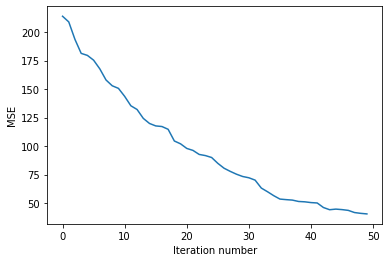

In [339]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

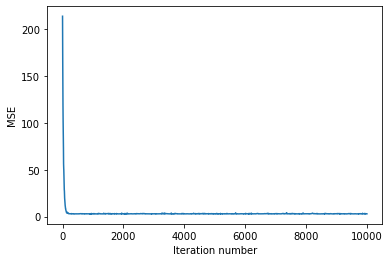

In [340]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [341]:
stoch_grad_desc_weights

array([14.18840901,  3.63310309,  2.84644722, -0.0299736 ])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [342]:
stoch_errors_by_iter[-1]

2.89479600457249

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [344]:
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False)

y_pred = linear_prediction(X, stoch_grad_desc_weights)
y = np.array(adver_data['Sales'])
answer4 =  mserror(y, y_pred) # Ваш код здесь
# answer4 =  stoch_errors_by_iter[-1]
print(round(answer4, 3))
# 2.856

2.895


In [282]:
a = np.array([1, 2, 3])
a_new = np.array([3, 6, 1])

((a - a_new)**2)

array([ 4, 16,  4], dtype=int32)